Scaling, Transformation & Normalization

Read data preprocessing article on scikit learn library website.

**Scalars** on linear data, select scalar based on ML algo can it handle -ve values 
1. Standardization
   1. standard scalar -3---+3
2. Scaling to known range
   1. 0--1 min max scaling
   2. max absolute scalar -1---1

Non Parametric Distribution
1. Qaunatile transformation
2. Mapping to guassian distribution

Normalization
process aplied on individual sample


```Most Frequent used scalars: If your algo deals with -ve values standard scalar is used, if not min max scalar is used```

Scaling purpose is to change range without changing distribution of data. It is specially important ot methods like SVM & KNN.
Methods include min max, z-score and others. it is used when data is measured on two different scales.

Normalization adjust the scale of data but also distribution of data. like transforming the skewed data to normal distribution.
Method are log transformation, box cox transformation, power transformation, quantile transformation.
used in machine learning when data is required as normal distribution for input.

When scaling scale all column to have relationship in between.

Rememebr to backscale at the end.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#make an example datset
data={
    'age':[10,15,25,35,40,45],
    'height':[100,150,160,190,170,200],
    'weight':[45,60,70,85,80,90]
}
df=pd.DataFrame(data)
df

# Standard scalar

In [ ]:
#import standard scaler
scaler=StandardScaler()

#fit the scaler
scaler.fit(df)

#transform the data
scaled_data=scaler.transform(df)

#convert to dataframe
df_scaled=pd.DataFrame(scaled_data,columns=df.columns)
df_scaled




# Other Scalars

In [ ]:
scaler=MinMaxScaler()

#fit the scaler
scaler.fit(df)

#transform the data
scaled_data=scaler.transform(df)

#convert to dataframe
df_scaled=pd.DataFrame(scaled_data,columns=df.columns)
df_scaled

In [ ]:
scaler=MaxAbsScaler()

#fit the scaler
scaler.fit(df)

#transform the data
scaled_data=scaler.transform(df)

#convert to dataframe
df_scaled=pd.DataFrame(scaled_data,columns=df.columns)
df_scaled

In [ ]:
scaler=RobustScaler()

#fit the scaler
scaler.fit(df)

#transform the data
scaled_data=scaler.transform(df)

#convert to dataframe
df_scaled=pd.DataFrame(scaled_data,columns=df.columns)
df_scaled

# Transformation
Making non normal data to normal distribution (guassian)

<Axes: ylabel='Count'>

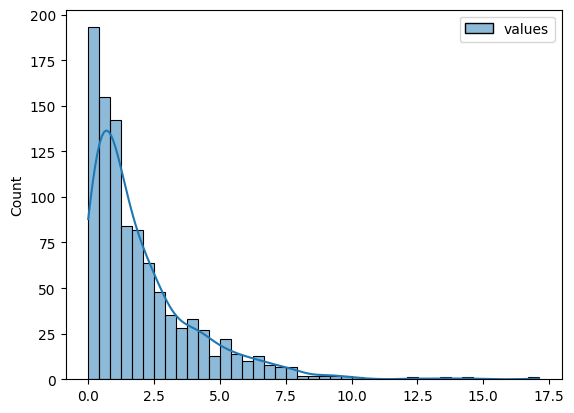

In [20]:
#generate non-normal data (exponential distribution)
np.random.seed(0)
data=np.random.exponential(size=1000,scale=2)
df=pd.DataFrame(data,columns=["values"])


#plot histogram with normal distribution
sns.histplot(data=df,kde=True)



In [27]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [28]:
pt_box_cox=PowerTransformer(method="box-cox")
#data must be greater than 0 for box cox
pt_yeo_johnson=PowerTransformer(method="yeo-johnson")
pt_qt=QuantileTransformer(output_distribution="normal")

In [35]:
#fit and transfor the data
pt_box_cox.fit(df)
pt_yeo_johnson.fit(df)
df_box_cox=pt_box_cox.transform(df)
df_yeo_johnson=pt_yeo_johnson.transform(df)
df_qt=pt_qt.fit_transform(df)
#convert to dataframe
df['box_cox']=pd.DataFrame(df_box_cox,columns=["values"])
df['yeo_johnson']=pd.DataFrame(df_yeo_johnson,columns=["values"])
df['qt']=pd.DataFrame(df_qt,columns=["values"])

In [36]:
df.head()

,values,box_cox,yeo_johnson,qt
0,1.591749,0.158969,0.179335,0.162552
1,2.511862,0.602906,0.677331,0.587964
2,1.846446,0.298068,0.339698,0.286135
3,1.574402,0.148897,0.167607,0.157469
4,1.102097,-0.164776,-0.202107,-0.154930


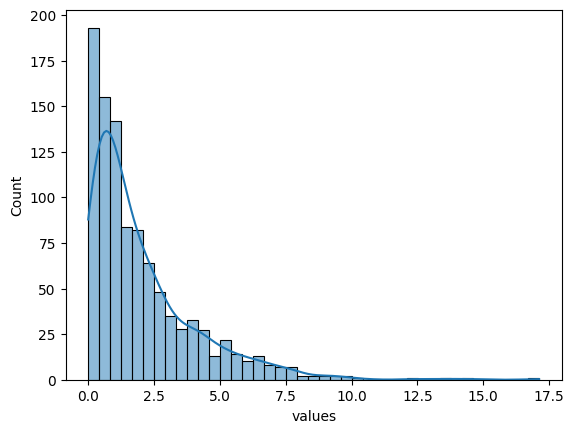

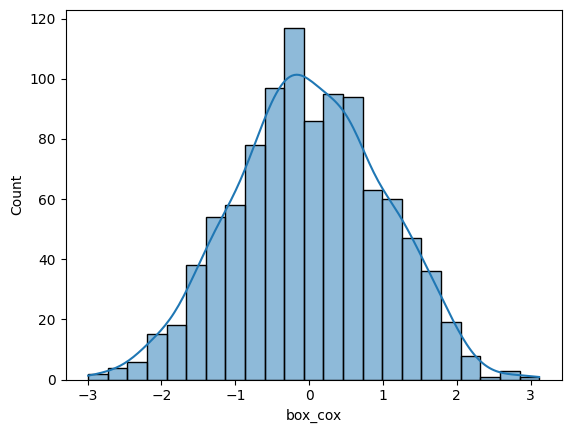

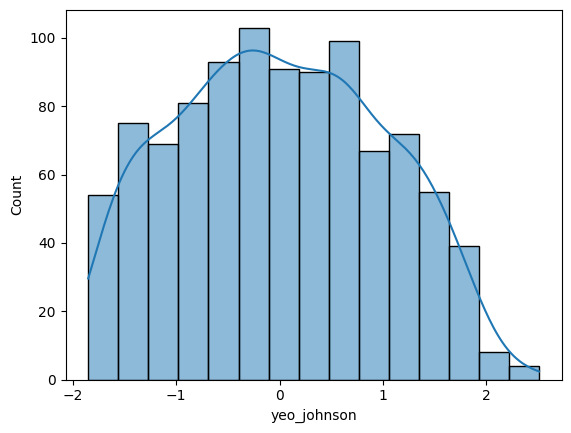

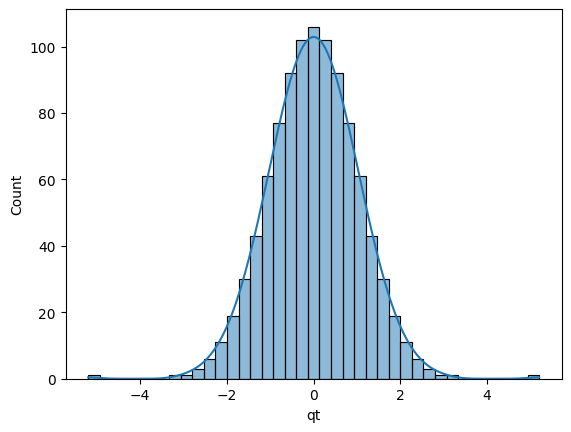

In [37]:
#create histogram with kde for all columns
for column in df.columns:
    sns.histplot(data=df[column], kde=True)
    plt.show()

Excellent normal tranformation by quantile transformation